In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
BASE_OUTPUT='/content/drive/MyDrive/Datasets/'

#use the base output to derive the path to the serialized
#model along with training history plot

MODEL_PATH=os.path.sep.join([BASE_OUTPUT,"siamese_model"])

In [ ]:
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
def euclidean_distance(vectors):
	# unpack the vectors into separate lists
	(featsA, featsB) = vectors
	# compute the sum of squared distances between the vectors
	sumSquared = K.sum(K.square(featsA - featsB), axis=1,
		keepdims=True)
	# return the euclidean distance between the vectors
	return K.sqrt(K.maximum(sumSquared, K.epsilon()))

In [ ]:
from imutils.paths import list_images

In [ ]:
# set up the directory containing our test images

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path='/content/drive/MyDrive/Datasets/exfaces/'

In [ ]:
testImagePaths = list(list_images(Path)) #grab the image paths in directory

In [ ]:
#Randomly generate 5 pairs of images
np.random.seed(20)
pairs = np.random.choice(testImagePaths, size=(5, 2))

In [ ]:
print(pairs)

[['/content/drive/MyDrive/Datasets/exfaces/michaela01.jpg'
  '/content/drive/MyDrive/Datasets/exfaces/thiery03.jpg']
 ['/content/drive/MyDrive/Datasets/exfaces/michaela02.jpg'
  '/content/drive/MyDrive/Datasets/exfaces/michaela04.jpg']
 ['/content/drive/MyDrive/Datasets/exfaces/thiery02.jpg'
  '/content/drive/MyDrive/Datasets/exfaces/denzel02.jpg']
 ['/content/drive/MyDrive/Datasets/exfaces/denzel01.jpg'
  '/content/drive/MyDrive/Datasets/exfaces/michaela04.jpg']
 ['/content/drive/MyDrive/Datasets/exfaces/thiery01.jpg'
  '/content/drive/MyDrive/Datasets/exfaces/michaela03.jpg']]


In [ ]:
#Load the model from the disk
from tensorflow.keras.models import load_model
model = load_model(MODEL_PATH)

In [ ]:
print(pairs.shape)

(5, 2)


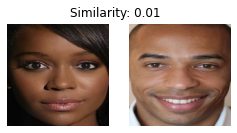

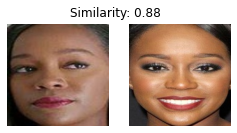

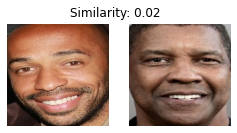

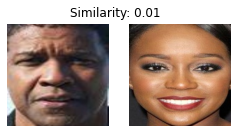

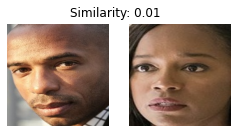

In [ ]:
#We can now compare our images for similarity

#loop over all image pairs
for (i, (pathA,pathB)) in enumerate(pairs):
  #load both images
  imageA=cv2.imread(pathA)
  imageB=cv2.imread(pathB)

  #create a copy of both images for visualization purposes
  origA=imageA.copy()
  origB=imageB.copy()

  #convert from BGR to RGB
  origA=cv2.cvtColor(origA,cv2.COLOR_BGR2RGB)
  origB=cv2.cvtColor(origB,cv2.COLOR_BGR2RGB)

  #add a batch dimension to both images
  imageA=np.expand_dims(imageA,axis=0)
  imageB=np.expand_dims(imageB,axis=0)

  #scale the pixel values to the range of 0,1
  imageA=imageA/255.0
  imageB=imageB/255.0

  #use our siamese model to make predictions on the image pair
  #indicate whether or not the images belong to the same class
  preds=model.predict([imageA,imageB])
  proba=preds[0][0]

  #initialize the figure
  fig=plt.figure("Pair #{}".format(i+1),figsize=(4,2))
  plt.suptitle("Similarity: {:.2f}".format(proba))

  #show first image
  ax=fig.add_subplot(1,2,1)
  plt.imshow(origA)
  plt.axis("off")

  #show the second image
  ax=fig.add_subplot(1,2,2)
  plt.imshow(origB)
  plt.axis("off")

  #show plot
  plt.show()





In [ ]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 128)          22808144    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model[0][0]                

#### Second eval round

In [ ]:
Path2='/content/drive/MyDrive/Datasets/batch2/'

In [ ]:
testImagePaths2 = list(list_images(Path2))

In [ ]:
#Randomly generate 5 pairs of images
np.random.seed(20)
pairs2 = np.random.choice(testImagePaths2, size=(37, 2))

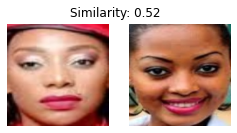

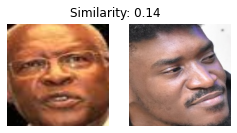

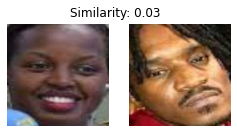

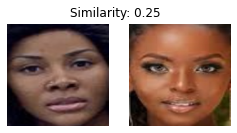

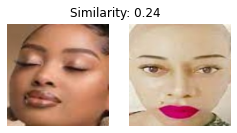

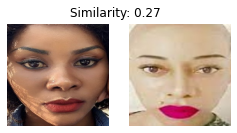

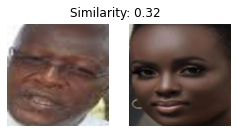

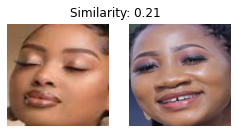

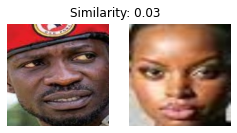

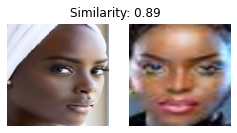

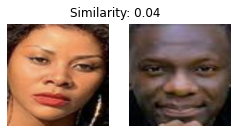

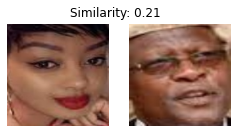

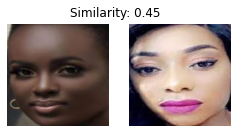

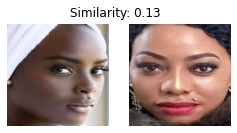

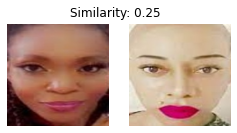

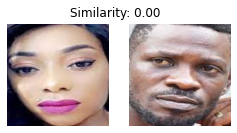

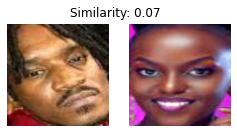

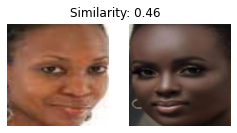

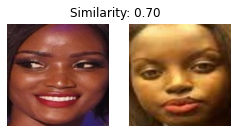

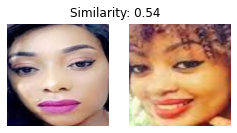

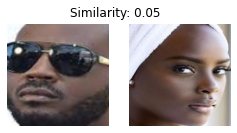

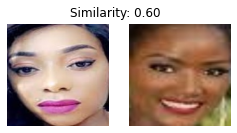

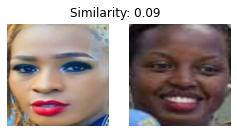

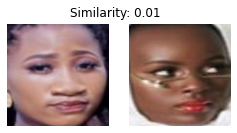

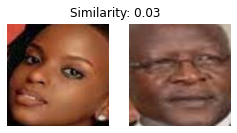

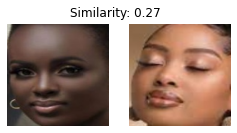

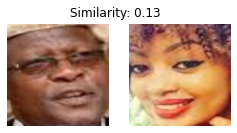

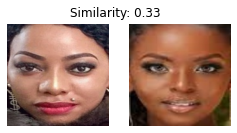

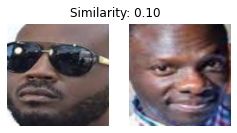

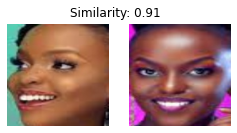

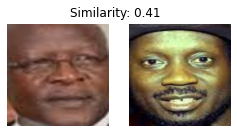

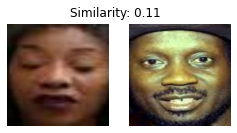

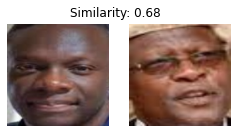

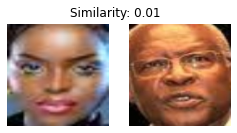

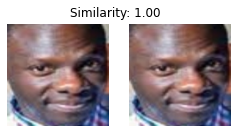

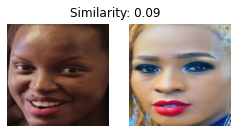

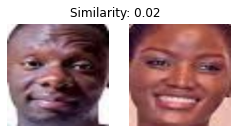

In [ ]:
#We can now compare our images for similarity

#loop over all image pairs
for (i, (pathA,pathB)) in enumerate(pairs2):
  #load both images
  imageA=cv2.imread(pathA)
  imageB=cv2.imread(pathB)

  #create a copy of both images for visualization purposes
  origA=imageA.copy()
  origB=imageB.copy()

  #convert from BGR to RGB
  origA=cv2.cvtColor(origA,cv2.COLOR_BGR2RGB)
  origB=cv2.cvtColor(origB,cv2.COLOR_BGR2RGB)

  #add a batch dimension to both images
  imageA=np.expand_dims(imageA,axis=0)
  imageB=np.expand_dims(imageB,axis=0)

  #scale the pixel values to the range of 0,1
  imageA=imageA/255.0
  imageB=imageB/255.0

  #use our siamese model to make predictions on the image pair
  #indicate whether or not the images belong to the same class
  preds=model.predict([imageA,imageB])
  proba=preds[0][0]

  #initialize the figure
  fig=plt.figure("Pair #{}".format(i+1),figsize=(4,2))
  plt.suptitle("Similarity: {:.2f}".format(proba))

  #show first image
  ax=fig.add_subplot(1,2,1)
  plt.imshow(origA)
  plt.axis("off")

  #show the second image
  ax=fig.add_subplot(1,2,2)
  plt.imshow(origB)
  plt.axis("off")

  #show plot
  plt.show()





#### Testing 3rd batch of images

In [ ]:
Path3='/content/drive/MyDrive/Datasets/batch3/'

In [ ]:
testImagePaths3 = list(list_images(Path3))

In [ ]:
#Randomly generate 541 pairs of images
np.random.seed(42)
pairs3 = np.random.choice(testImagePaths3, size=(541, 2))

In [ ]:
#We can now compare our images for similarity

#loop over all image pairs
for (i, (pathA,pathB)) in enumerate(pairs3):
  #load both images
  imageA=cv2.imread(pathA)
  imageB=cv2.imread(pathB)

  #create a copy of both images for visualization purposes
  origA=imageA.copy()
  origB=imageB.copy()

  #convert from BGR to RGB
  origA=cv2.cvtColor(origA,cv2.COLOR_BGR2RGB)
  origB=cv2.cvtColor(origB,cv2.COLOR_BGR2RGB)

  #add a batch dimension to both images
  imageA=np.expand_dims(imageA,axis=0)
  imageB=np.expand_dims(imageB,axis=0)

  #scale the pixel values to the range of 0,1
  imageA=imageA/255.0
  imageB=imageB/255.0

  #use our siamese model to make predictions on the image pair
  #indicate whether or not the images belong to the same class
  preds=model.predict([imageA,imageB])
  proba=preds[0][0]

  #initialize the figure
  fig=plt.figure("Pair #{}".format(i+1),figsize=(4,2))
  plt.suptitle("Similarity: {:.2f}".format(proba))

  #show first image
  ax=fig.add_subplot(1,2,1)
  plt.imshow(origA)
  plt.axis("off")

  #show the second image
  ax=fig.add_subplot(1,2,2)
  plt.imshow(origB)
  plt.axis("off")

  #show plot
  plt.show()





In [ ]:
#Randomly generate 541 pairs of images
np.random.seed(42)
pairs3 = np.random.choice(testImagePaths3, size=(30, 2))

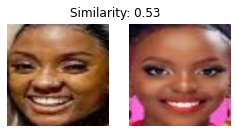

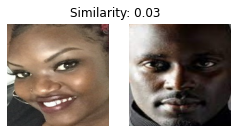

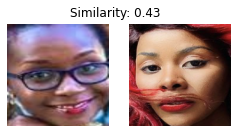

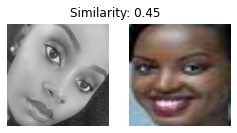

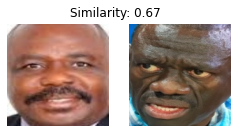

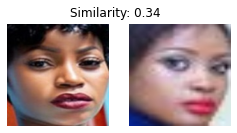

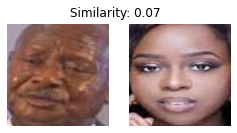

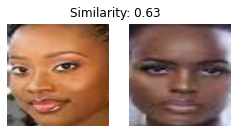

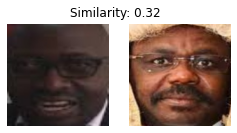

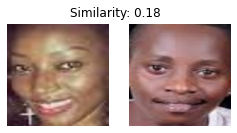

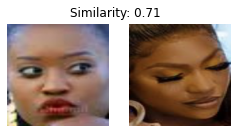

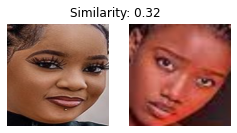

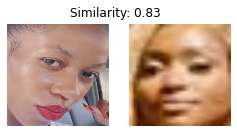

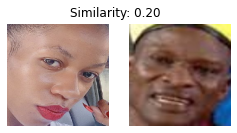

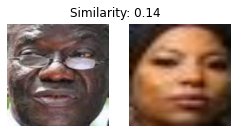

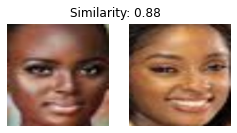

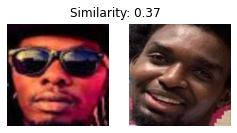

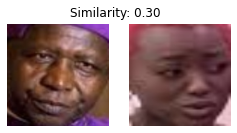

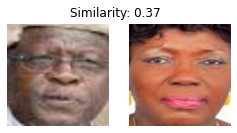

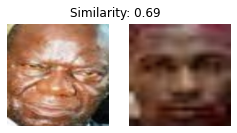

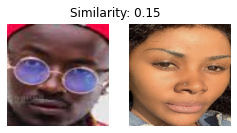

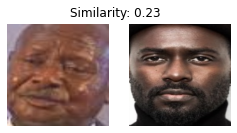

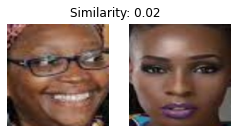

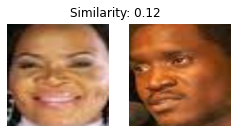

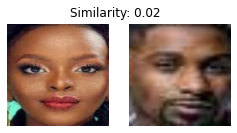

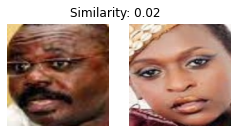

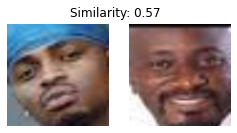

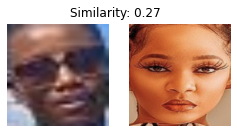

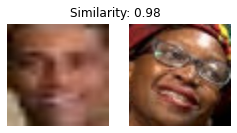

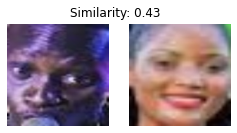

In [ ]:
#We can now compare our images for similarity

#loop over all image pairs
for (i, (pathA,pathB)) in enumerate(pairs3):
  #load both images
  imageA=cv2.imread(pathA)
  imageB=cv2.imread(pathB)

  #create a copy of both images for visualization purposes
  origA=imageA.copy()
  origB=imageB.copy()

  #convert from BGR to RGB
  origA=cv2.cvtColor(origA,cv2.COLOR_BGR2RGB)
  origB=cv2.cvtColor(origB,cv2.COLOR_BGR2RGB)

  #add a batch dimension to both images
  imageA=np.expand_dims(imageA,axis=0)
  imageB=np.expand_dims(imageB,axis=0)

  #scale the pixel values to the range of 0,1
  imageA=imageA/255.0
  imageB=imageB/255.0

  #use our siamese model to make predictions on the image pair
  #indicate whether or not the images belong to the same class
  preds=model.predict([imageA,imageB])
  proba=preds[0][0]

  #initialize the figure
  fig=plt.figure("Pair #{}".format(i+1),figsize=(4,2))
  plt.suptitle("Similarity: {:.2f}".format(proba))

  #show first image
  ax=fig.add_subplot(1,2,1)
  plt.imshow(origA)
  plt.axis("off")

  #show the second image
  ax=fig.add_subplot(1,2,2)
  plt.imshow(origB)
  plt.axis("off")

  #show plot
  plt.show()

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# tf.saved_model.save(model, "/content/drive/MyDrive/Datasets/savedOneshotModel")

# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    [tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype),tf.TensorSpec(model.inputs[1].shape, model.inputs[1].dtype)])

# # Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 50)
print("Frozen model layers: ")
for layer in layers:
    print(layer)

# print("-" * 50)
# print("Frozen model inputs: ")
# print(frozen_func.inputs)
# print("Frozen model outputs: ")
# print(frozen_func.outputs)

# # Save frozen graph from frozen ConcreteFunction to hard drive
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir="/content/drive/MyDrive/Datasets/savedOneshotModel",
                  name="faceNetOneshotJune.pbtxt",
                  as_text=True)

--------------------------------------------------
Frozen model layers: 
x
x_1
model_1/model/inception_resnet_v1/Conv2d_1a_3x3/Conv2D/ReadVariableOp/resource
model_1/model/inception_resnet_v1/Conv2d_1a_3x3/Conv2D/ReadVariableOp
model_1/model/inception_resnet_v1/Conv2d_1a_3x3/Conv2D
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/scale
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/ReadVariableOp/resource
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/ReadVariableOp
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/FusedBatchNormV3/ReadVariableOp/resource
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/FusedBatchNormV3/ReadVariableOp
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/FusedBatchNormV3/ReadVariableOp_1/resource
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/FusedBatchNormV3/ReadVariableOp_1
model_1/model/inception_resnet_v1/Conv2d_1a_3x3_BatchNorm/FusedBatchNormV3
model_1/model/inception_resnet_v1/Conv2d_

'/content/drive/MyDrive/Datasets/savedOneshotModel/faceNetOneshotJune.pbtxt'

In [ ]:
model.input_shape

[(None, 160, 160, 3), (None, 160, 160, 3)]

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 128)          22808144    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model[0][0]                

In [ ]:
import numpy as np


In [ ]:
a=np.zeros((1,160,160,3))
b=np.zeros((1,160,160,3))

In [ ]:
z=np.array([a,b])

In [ ]:
print(z.shape)

(2, 1, 160, 160, 3)
